## Rheokinetics (44 points)

#### Apurv Rahul Kode (5717221); Michal Fedoroňko (5004527); Prajwal Jayaraman (5901324)

In [144]:
#import packages here
import numpy as np
from matplotlib import pyplot as plt

#### In the last notebook, you got familiar with the kinetics related to the curing of thermoset polymers. This time, the focus will be on flow-related topics of such polymers. This is applicable to several manufacturing techniques you heard of in the lectures, like liquid composite moulding. This area of study is called rheology, and it plays a fundamental role in the manufacturing of polymers, serving as a crucial scientific discipline that governs the viscosity, flow and deformation behavior of polymer materials. Deep knowledge of rheology is indispensable to work in polymer composite manufacturing. This field enables control of material behavior and improved quality of produced parts.

#### As you now know, the curing of a thermoset consists of chemical reactions between individual monomers, or polymer chains and monomers, or polymer chains and other polymer chains. This phenomenon, known as cross-linking, results in a progressive increase in the molecular weight of thermosets, leading to a corresponding rise in viscosity.
#### The viscosity of a fluid is a measure of its resistance to deformation at a given rate. Viscosity can be conceptualized as quantifying the internal frictional force that arises between adjacent layers of fluid that are in relative motion.

### Question 1 (2 points)

#### As explained above, viscosity changes as the degree of cure $\alpha$ changes. Explain, on a physical and chemical level, why this occurs. Also briefly discuss why this variable is important to understand for liquid composite moulding manufacturing.

Answer: On a physical level, with increasing degree of cure, the chains of the polymer increase in length thereby restricting their movement. The effect of this is a higher viscosity with increasing degree of cure. On a chemical level, increasing degree of cure results in gelation of the resin and rapid increase in cross-linking of the polymer chains. This also results in quick increase in viscosity of the resin. 

Viscosity is an important variable to consider when it comes to LCM manufacturing. Ideally, the resin must have an appropriate viscosity to infuse throughout the part with minimum pore volume before it begins to cure.

#### Several models exists to predict the flow behaviour of thermoset materials. The Castro-Macosko model is a widely used and well-established model to simulate the changes in viscosity of thermoset materials. The model describes the viscosity as a function of temperature $T$ and degree of cure $\alpha$. Shear rate $\gamma$ will not be considered in this version of the model. The model is displayed in equation 1.

$$\eta(T, \alpha) = \eta_0(T) (\frac{\alpha_g}{\alpha_g - \alpha})^{c1+c2\alpha}$$

#### For which $\eta_0(T) = A \exp \frac{T_b}{T}$ and $T_b, c1, c2, \alpha_g$ and $A$ are material properties. 
#### The parameter $\alpha_g$ identifies the degree of cure at which gelation occurs, at which point the viscosity of material increases significantly.

The following model is given to you for the considered dicyanate: 1,1-bis(4-cyanatophenol)ethane, known as AroCy L-10, supplied by Rhone-Poulenc Inc.
$$\eta(T, \alpha) = 3.32 \cdot 10^{-8} \exp \frac{5160.39}{T} (\frac{0.64}{0.64 - \alpha})^{2.32+1.4\alpha}$$
The parameters are reported below:
$T_b = 5160.39 K$
$c_1 = 2.32$
$c_2 = 1.4$
$\alpha_g = 0.64$
$A = 3.32 \cdot 10^{-8} Pa \cdot s$

Source: Chen, Y.-T. and Macosko, C.W. (1996), Kinetics and rheology characterization during curing of dicyanates. J. Appl. Polym. Sci., 62: 567-576. https://doi-org.tudelft.idm.oclc.org/10.1002/(SICI)1097-4628(19961017)62:3<567::AID-APP14>3.0.CO;2-W

### Question 2 (3 points)

#### Question 2.1: Plot for this resin system the viscosity versus the degree of cure for several isothermal cure temperatures. Report the chosen temperatures and choose a suitable scale for the axes.

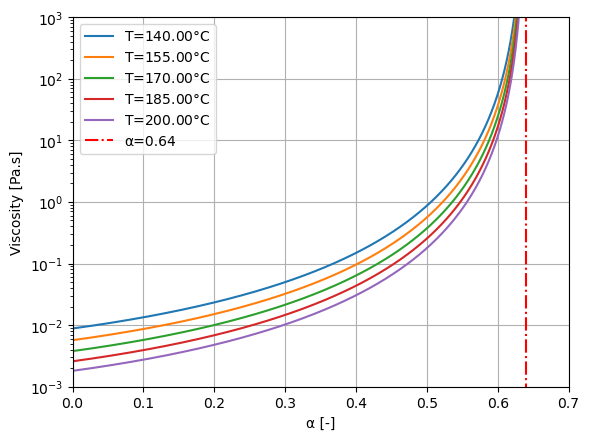

In [145]:
T0 = 273.15
RT = 25
def viscosity_dicyanate(T,alpha):
    return 3.32e-8 * np.exp(5160.39/(T+T0)) * np.power(0.64/(0.64-alpha), 2.32+1.4*alpha)
T = np.linspace(140,200,5)
alpha = np.linspace(0,0.639999,10000)
#plt.plot(alpha, viscosity_dicyanate(RT, alpha), label=f'T={RT:.2f}$\degree$C', color='black')
for iso in T:
    plt.plot(alpha, viscosity_dicyanate(iso, alpha), label=f'T={iso:.2f}$\degree$C')

plt.plot([0.64]*1000,np.linspace(0,1e6,1000), color='r', linestyle='dashdot', label='α=0.64')
plt.legend() 
plt.grid()
plt.xlabel('α [-]')
plt.ylabel('Viscosity [Pa.s]')
plt.yscale('log')
plt.ylim(1e-3,1e3)
plt.xlim(0,0.7)
plt.show()

#### Question 2.2: Which information regarding the processability of this resin can be retrieved from the graph? You can include considerations that would be relevant for LCM processes such as choice of different cure temperatures and how viscosity plays a role in the process and discuss important observations made from the graph.

Answer: The graph above reveals the degree of cure before which infusion of a component should ideally be complete. Since a minimum resin viscosity is required for a given component, it must be completely infused before a certain degree of cure is reached. Beyond a certain degree of cure, the viscosity may be too high to continue LCM manufacturing techniques. Cure temperatures that could be used to produce the component can also be determined since higher temperatures yield lower viscosity to begin with. 

As can be observed from the graph plotted above, the resin shows very high viscosity values as the degree of cure at gelation is approached, represented as a red dashed vertical line. As the cure temperatures increase, the resin viscosity at which curing begins decreases. From the perspective of processibility, this allows the infusion processes to continue at a slightly higher degree of cure since the resin viscosity is still acceptable.

### Question 3 (4 points)

#### The goal of this question is to analyze the correlation between viscosity, temperature and heating rate for non-isothermal curing. In the image below, a typical viscosity vs. temperature plot is displayed for values obtained experimentally and through the Castro-Macosko model. A U-shape viscosity curve pattern can be observed when the temperature is increased. The viscosity drops at first, but ater reaching a minimum, viscosity soon increases significantly.

#### Explain the behaviour of viscosity while curing, specifically:
#### 1. What is the reason behind the initial lowering of resin viscosity?
#### 2. What information does the minimum of the curve provide?
#### 3. Why does this trend change significantly, after reaching a certain temperature?
#### 4. How does the heating rate effect the shape of the curve and why?
#### Write your answer in the textbox below the image and please provide complete and detailed explanations. You can refer to the Castro-Macosko equation as part of your answer.

![title](eta_temp.png)

Answer: 
1. The higher temperature results in higher mobility of the monomers and polymers within the resin. This means that the movement of the chains is easier than at lower temperature and this is visible as a decrease of viscosity. Referring to the Castro-Macosko equation, for a given degree of cure $\alpha$, increasing the temperature will decrease the viscosity as $\eta \propto \frac{1}{T}$. 

2. The minimum of the curve is the point at which the resin has the least viscosity. The viscosity at this point would be ideal for infusion of the resin in liquid composite moulding. The infusion of the composite component must be completed before the temperature is increased since  the viscosity of the resin increases rapidly past this point. This rapid increase is also observed by the Castro-Macosko equation as the degree of cure at gelation approaches.

3. After reaching a certain temperature, rate of cross-linking between polymer chains with respect to the mobility of these chains is much higher. This sudden and rapid increase in viscosity may also suggest that it is approaching resin gelation. 

4. At lower heating rates, the resin has time to "react" to the changes in temperature and increase the length of polymer chains, reaching the minimum viscosity at a lower temperature. At higher heating rates, less cross-linking takes place in time, which allows the resin to reach a lower viscosity at a higher temperature before viscosity begins to rapidly increase again. 

#### Dynamic Mechanical Analysis, otherwise known as DMA,  is an experimental technique employed to investigate the response of materials to cyclic deformations under controlled conditions (stress, temperature, frequency, and various other parameters).

#### DMA works by applying a sinusoidal deformation to a sample of known geometry. The sample can be subjected to a controlled stress or a controlled strain. For a known stress, the sample will then deform a certain amount (or vice versa). The extent of deformation exhibited by the specimen is indicative of its stiffness.

#### DMA characterizes the material in terms of stiffness and damping, which are quantified as modulus and tangent delta (tan δ). Given the sinusoidal excitation, modulus can be further divided into in-phase (storage modulus, G') and out-of-phase (loss modulus, G'') components. The storage modulus, G', delineates the material's elastic behavior. $tan(\delta)$, calculated as the ratio of the loss modulus to the storage modulus, represents damping and serves as a measure of a material's capacity to dissipate energy.

### Question 4 (3 points)

#### The image below shows a shear-stress shear-strain relationship for various materials over time. As mentioned above, the shear-strain is applied in a sinusoidal manner. This leads to shear-stresses in various different ways. 

#### Comment on the shapes and phase-shifts of the graphs of the Hooke solid, Newton fluid, and polymer. Explain why these are exactly the results you would expect from a DMA analysis on these 3 materials.

![title](phase_shift.png)

The shear stress and shear strain for a Hooke solid are linearly related. $$ \tau = G * \gamma(t) $$ This is why applying a shear strain in a sinusoidal manner gives a sinusoidal shape to the Hooke soild graph. This also explains why at maximum applied shear strain, there is maximum shear stress.

The shear stress and shear strain for a newtonian fluid are related in following manner: $$ \tau = \mu * \dot \gamma(t) $$ Here, $\tau$ is the shear stress, $\mu$ is the dynamic viscosity and $\dot \gamma$ is the shear rate. This also results in a sinusoidal shape for the newtonian fluid. 

Assuming that applied shear strain $\gamma(t)=\sin(t)$, shear stress for a hooke solid would have no phase shift due to their linear relation. At $\delta = 0\degree$, there is purely elastic response.  For a newtonian fluid on the other hand, $\dot \gamma=\cos(t)$ which is equivalent to a 90 degree phase shift, $\dot \gamma=\sin(t+\frac{\pi}{2})$. At $\delta = 90\degree$, there is purely viscous response. Since a polymer lies between a hooke solid and a newtonian fluid, a phase shift between 0 degrees and 90 degrees is observed.

#### From tests like these, information about the storage modulus G' and loss modulus G'' can be derived. This is achieved via a known complex relationship between shear-stress and shear-strain.
$$ G* = \frac{\tau_{max}}{\gamma_{max}} = G' + iG'' $$

#### This can then be used to relate to the phase shift $\delta$ in the following manner.
$$ tan(\delta) = \frac{G''}{G'} $$

### Question 5 (2 points)

#### A spreadsheet containing DMA measurement data has been provided to you with this notebook. In this dataset, storage and loss moduli are noted for different frequencies at different temperatures. The sample is Airstone 780E, at 95% cure (only use sample #1).
#### From this data, plot two graphs showing $G'$ and $G''$ vs. temperature (for each frequency) and $tan(\delta)$ vs. temperature (for each frequency). Make sure to choose a suitable scale for the axes.

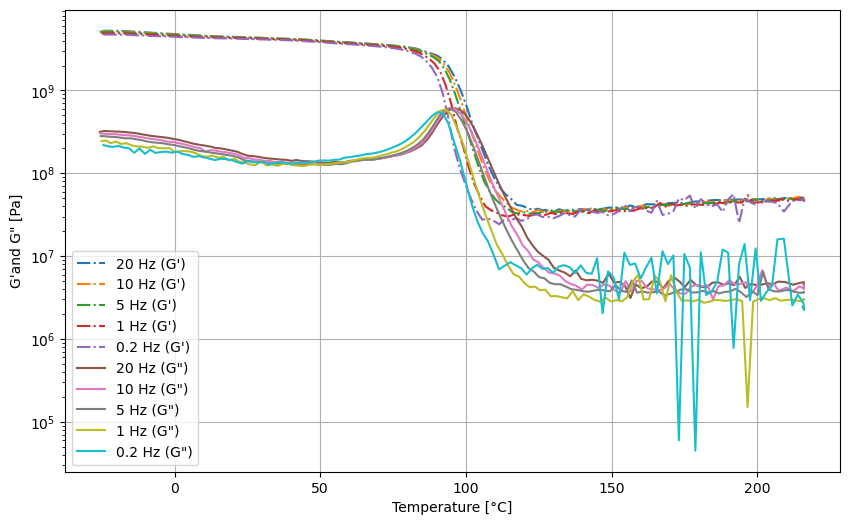

In [146]:
# Code for 1st plot here
# We choose to cut of the dma_data.csv at the point that the maximum temperature is reached
# After this, the sample begins to cool down and the values given are not consistent with the previously measured values
# They are thus discarded to enable us to perfom this analysis.
data = np.genfromtxt('dma_data_2.csv', delimiter=',', dtype=float)  
variable = ['Freq.','Temp.',"E'(G')",'E"(G")','dL','tanD','Ft','Time']
unit = ['Hz','Cel','Pa','Pa','um','','mN','min'] 
frequencies = [20., 10., 5., 1., 0.2]
data_20, data_10, data_5, data_1, data_02 = [], [], [], [], []

i = 0
while i < len(data):
    data_20.append(data[i+0])
    data_10.append(data[i+1])
    data_5.append(data[i+2])
    data_1.append(data[i+3])
    data_02.append(data[i+4])
    i+=5
    if i == 740:
        data_20.append(data[i])
        data_10.append(data[i+1])
        data_5.append(data[i+2])
        i+=5

data_20 = np.asarray(data_20)
data_10 = np.asarray(data_10)
data_5 = np.asarray(data_5)
data_1 = np.asarray(data_1)
data_02 = np.asarray(data_02)

plt.figure(figsize=(10,6))
plt.plot(data_20[:,1],data_20[:,2], label="20 Hz (G')", linestyle='dashdot')
plt.plot(data_10[:,1],data_10[:,2], label="10 Hz (G')", linestyle='dashdot')
plt.plot(data_5[:,1],data_5[:,2], label="5 Hz (G')", linestyle='dashdot')
plt.plot(data_1[:,1],data_1[:,2], label="1 Hz (G')", linestyle='dashdot')
plt.plot(data_02[:,1],data_02[:,2], label="0.2 Hz (G')", linestyle='dashdot')

plt.plot(data_20[:,1],data_20[:,3], label='20 Hz (G")')
plt.plot(data_10[:,1],data_10[:,3], label='10 Hz (G")')
plt.plot(data_5[:,1],data_5[:,3], label='5 Hz (G")')
plt.plot(data_1[:,1],data_1[:,3], label='1 Hz (G")')
plt.plot(data_02[:,1],data_02[:,3], label='0.2 Hz (G")')
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylabel("G'"+'and G" [Pa]')
plt.xlabel('Temperature [°C]')
plt.show()

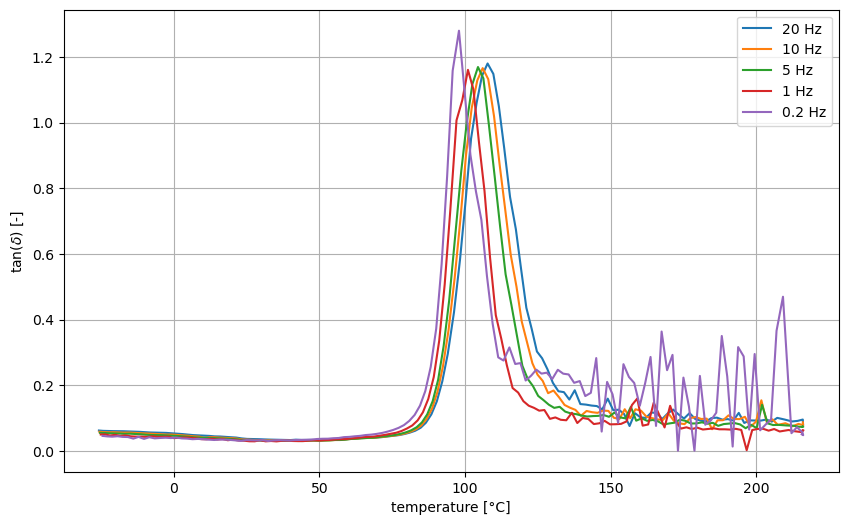

In [147]:
# Code for 2nd plot here
plt.figure(figsize=(10,6))
plt.plot(data_20[:,1],data_20[:,5], label='20 Hz')
plt.plot(data_10[:,1],data_10[:,5], label='10 Hz')
plt.plot(data_5[:,1],data_5[:,5], label='5 Hz')
plt.plot(data_1[:,1],data_1[:,5], label='1 Hz')
plt.plot(data_02[:,1],data_02[:,5], label='0.2 Hz')
plt.legend()
plt.grid()
plt.ylabel('tan($\delta$) [-]')
plt.xlabel('temperature [°C]')
plt.show()

### Question 6 (2 points)

#### Consider the plots you generated in the previous question, showing the variations of G' and G'' as functions of temperature for Airstone 780E. Now, please address the following points regarding the relationship between moduli and temperature:
#### - Explain why there is a decrease in the storage modulus G'.
#### - Elaborate on why the loss modulus G'' shows a peak
#### Please provide detailed answers below

Answer:
The storage modulus G' is an indication of the material's structure and its ability to store energy. A higher storage modulus indicates a more solid material with the ability to store energy rather than deform easily. As temperatures reach closer to the glass transition temperature the material undergoes transitions from a glassy to a rubbery state. The decreasing ability of the structure to store energy is logical since molecular mobility increases. This is why the storage modulus decreases as it approaches the glass transition temperature due to a changing state of the material.

The increased molecular mobility close to the glass transition temperature has a different effect on the loss modulus. The loss modulus is attributed to the energy dissipation properties of the material. Since increasing temperatures allow the material to behave more rubbery, the loss modulus increases temporarily. Higher molecular chain mobility allows energy to be dissipated more easily, resulting in increased loss modulus. This value peaks and then drops again as temperatures continue to increase past the glass transition temperature. The drop in loss modulus past the Tg can be physically explained. After the transition of the material to a rubbery state, less energy is stored in the material, and we see a decrease in storage modulus. That means there is less energy available to be dissipated as well, reducing the loss modulus of the material.


### Question 7 (3 points)

#### What can you derive from your results of question 5? What effect does the frequency have on storage modulus $G'$? Explain how this happens and why it is important to take this into consideration.

Answer:
From the plots derived from question 5, its can be observed that at higher frequencies of cyclic load application, the phase transition and the respective glass transition temperature is delayed. This phase transition at a higher temperature can be understood by looking at the molecular response of the polymer. When a cyclic load is applied, polymer chains tend to relax and redistribute. These are characterized as molecular dynamics and relaxation. At higher frequencies, the polymer chains have less time to react to these changes and tend to resist the constant change in load application. This makes the polymer appear stiffer, resulting in a delayed phase transition and glass transition temperature. These effects are important to consider when studying the application of the polymer. Frequency of load application on components designed to operate at temperatures close to material Tg would be a crucial in ensuring required mechanical behavior.


### Question 8 (8 points)

#### Question 8.1: From the above-used dataset, plot storage modulus vs. temperature for every frequency. Then, find $T_g$ for each curve by using the following method: Tg can be determined from the intersection of two lines that are drawn in two regions; one in the brittle glassy state and the other in the transition region. The temperature at which these 2 lines intersect can be considered $T_g$. Report the found values of $T_g$ in the title(s). Also, demonstrate this method in the said plot: plot the intersecting lines on top of the data. If you feel it's necessary, zoom in on the points of intersect.
#### NOTE: make  an individual plot for each frequency dataset, therefore five graphs should be plotted separately

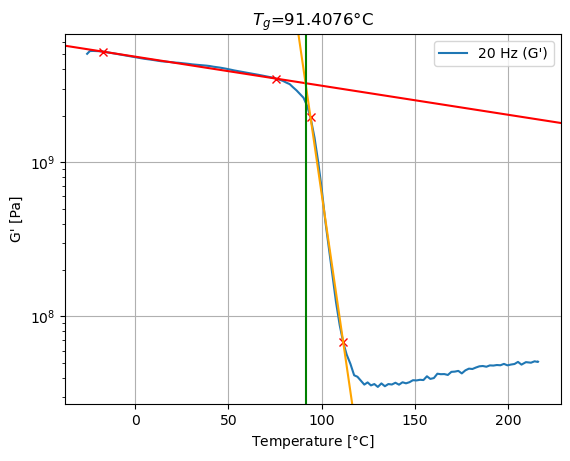

In [148]:
### 20Hz ###
plt.plot(data_20[:,1],data_20[:,2], label="20 Hz (G')")
start, stop = 5, 55
plt.plot([data_20[start][1],data_20[stop][1]],[data_20[start][2],data_20[stop][2]], 'rx')
plt.axline((data_20[start][1],data_20[start][2] ),(data_20[stop][1],data_20[stop][2]), color='red')
i, j = 65, 74
plt.plot([data_20[i][1],data_20[j][1]],[data_20[i][2],data_20[j][2]], 'rx')
plt.axline((data_20[i][1],data_20[i][2] ),(data_20[j][1],data_20[j][2]), color='orange')
T_g_20 = 91.4076
plt.axvline(x=T_g_20, color='green')
#these lines can be used to zoom in on the intersection, uncomment them to use it
#plt.ylim(3.24e9,3.26e9)
#plt.xlim(91.405,91.41)
plt.legend()
plt.title(f'$T_g$={T_g_20}$\degree$C')
plt.yscale('log')
plt.ylabel("G' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.grid()
plt.show()

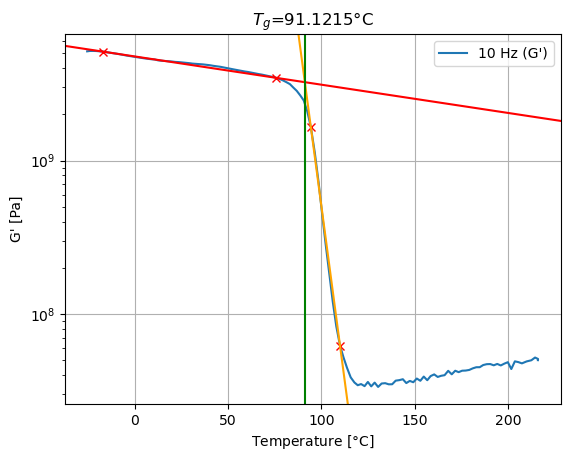

In [149]:

### 10Hz ###
plt.plot(data_10[:,1],data_10[:,2], label="10 Hz (G')")
start, stop = 5, 55
plt.plot([data_10[start][1],data_10[stop][1]],[data_10[start][2],data_10[stop][2]], 'rx')
plt.axline((data_10[start][1],data_10[start][2] ),(data_10[stop][1],data_10[stop][2]), color='red')
i, j = 65, 73
plt.plot([data_10[i][1],data_10[j][1]],[data_10[i][2],data_10[j][2]], 'rx')
plt.axline((data_10[i][1],data_10[i][2] ),(data_10[j][1],data_10[j][2]), color='orange')
T_g_10 = 91.1215
plt.axvline(x=T_g_10, color='green')

#these lines can be used to zoom in on the intersection, uncomment them to use it
#plt.ylim(3.2325e9,3.2375e9)
#plt.xlim(91.121,91.122)
plt.legend()
plt.title(f'$T_g$={T_g_10}$\degree$C')
plt.yscale('log')
plt.ylabel("G' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.grid()
plt.show()

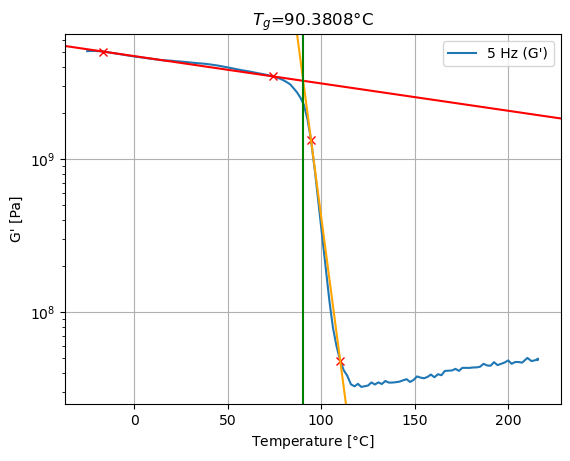

In [150]:
### 5Hz ###
plt.plot(data_5[:,1],data_5[:,2], label="5 Hz (G')")
start, stop = 5, 54
plt.plot([data_5[start][1],data_5[stop][1]],[data_5[start][2],data_5[stop][2]], 'rx')
plt.axline((data_5[start][1],data_5[start][2] ),(data_5[stop][1],data_5[stop][2]), color='red')
i, j = 65, 73
plt.plot([data_5[i][1],data_5[j][1]],[data_5[i][2],data_5[j][2]], 'rx')
plt.axline((data_5[i][1],data_5[i][2] ),(data_5[j][1],data_5[j][2]), color='orange')
T_g_5 = 90.3808
plt.axvline(x=T_g_5, color='green')

#these lines can be used to zoom in on the intersection, uncomment them to use it
#plt.ylim(3.235e9,3.245e9)
#plt.xlim(90.38,90.381)
plt.legend()
plt.title(f'$T_g$={T_g_5}$\degree$C')
plt.yscale('log')
plt.ylabel("G' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.grid()
plt.show()

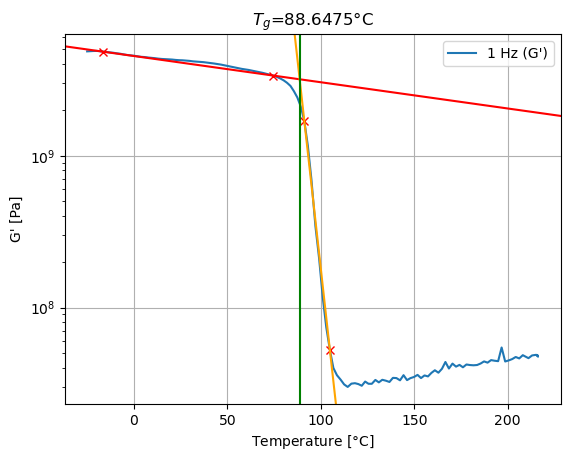

In [151]:
### 1Hz ###
plt.plot(data_1[:,1],data_1[:,2], label="1 Hz (G')")
start, stop = 5, 54
plt.plot([data_1[start][1],data_1[stop][1]],[data_1[start][2],data_1[stop][2]], 'rx')
plt.axline((data_1[start][1],data_1[start][2] ),(data_1[stop][1],data_1[stop][2]), color='red')
i, j = 63, 70
plt.plot([data_1[i][1],data_1[j][1]],[data_1[i][2],data_1[j][2]], 'rx')
plt.axline((data_1[i][1],data_1[i][2] ),(data_1[j][1],data_1[j][2]), color='orange')
T_g_1 = 88.6475
plt.axvline(x=T_g_1, color='green')
#these lines can be used to zoom in on the intersection, uncomment them to use it
#plt.ylim(3.15e9,3.2e9)
#plt.xlim(88.64,88.66)
plt.legend()
plt.title(f'$T_g$={T_g_1}$\degree$C')
plt.yscale('log')
plt.ylabel("G' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.grid()
plt.show()

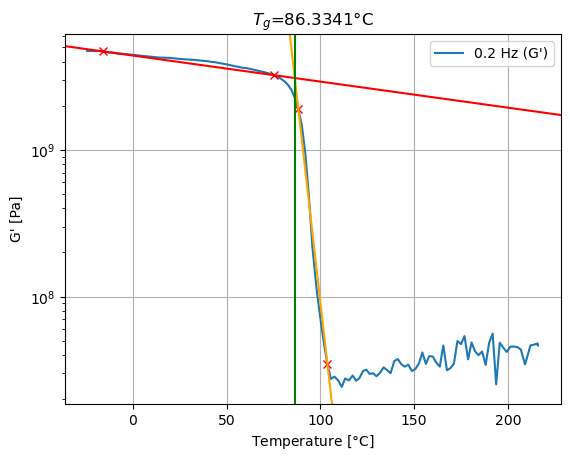

In [152]:
### 0.2Hz ###
plt.plot(data_02[:,1],data_02[:,2], label="0.2 Hz (G')")
start, stop = 5, 54
plt.plot([data_02[start][1],data_02[stop][1]],[data_02[start][2],data_02[stop][2]], 'rx')
plt.axline((data_02[start][1],data_02[start][2] ),(data_02[stop][1],data_02[stop][2]), color='red')
i, j = 61, 69
plt.plot([data_02[i][1],data_02[j][1]],[data_02[i][2],data_02[j][2]], 'rx')
plt.axline((data_02[i][1],data_02[i][2] ),(data_02[j][1],data_02[j][2]), color='orange')
T_g_02 = 86.3341
plt.axvline(x=T_g_02, color='green')
#these lines can be used to zoom in on the intersection, uncomment them to use it
#plt.ylim(3.0875e9,3.0925e9)
#plt.xlim(86.333,86.335)
plt.legend()
plt.title(f'$T_g$={T_g_02}$\degree$C')
plt.yscale('log')
plt.ylabel("G' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.grid()
plt.show()


T_g_intersection = [T_g_20, T_g_10, T_g_5, T_g_1, T_g_02]


#### Question 8.2: In Question 8.1, you determined the $T_g$ for each frequency by determining the onset of the storage modulus curve. Now, find values for $T_g$ (for each frequency) using the inflection point of the storage modulus curve. The inflection point is defined as the midpoint between the onset and offset of the curve. Like you did before, plot the intersecting lines and the point of interest on top of the data.
#### NOTE: make  an individual plot for each frequency dataset, therefore five graphs should be plotted separately

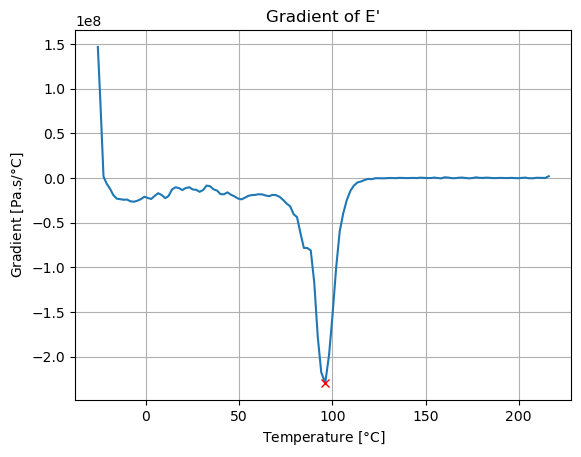

In [153]:
# this code actually computes the inflection point, so not the way it is described in the question
# We think this is a more rigorous way to find the inflection point.
grads_20 = np.gradient(data_20[:,2], data_20[:,1])
inflect_20 = np.where(grads_20 == np.min(grads_20))[0][0]
plt.plot(data_20[:,1], grads_20)
plt.plot(data_20[inflect_20][1], grads_20[inflect_20], 'rx', label='20Hz')
plt.title("Gradient of E'")
plt.ylabel('Gradient [Pa.s/$\degree$C]')
plt.xlabel('Temperature [$\degree$C]')
plt.grid()
plt.show()

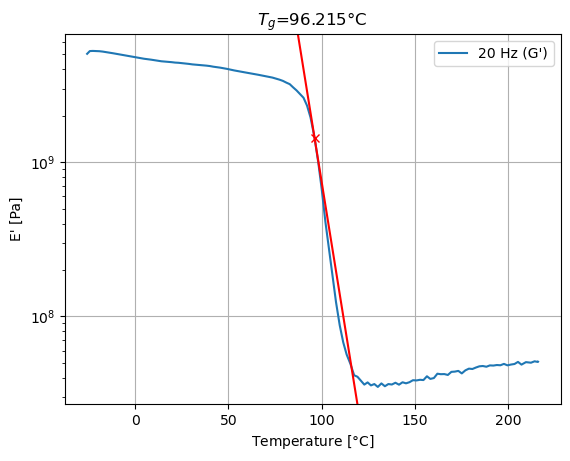

In [154]:
grads_20 = np.gradient(data_20[:,2], data_20[:,1])
inflect_20 = np.where(grads_20 == np.min(grads_20))[0][0]
T_g_20 = data_20[inflect_20][1]
plt.plot(data_20[:,1],data_20[:,2], label="20 Hz (G')")
plt.plot(data_20[inflect_20][1], data_20[inflect_20][2], 'rx')
plt.axline((data_20[inflect_20][1], data_20[inflect_20][2]),(data_20[inflect_20][1]+1, np.min(grads_20)+data_20[inflect_20][2]), color='red' )
plt.title(f'$T_g$={T_g_20:.3f}$\degree$C')
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylabel("E' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.show()

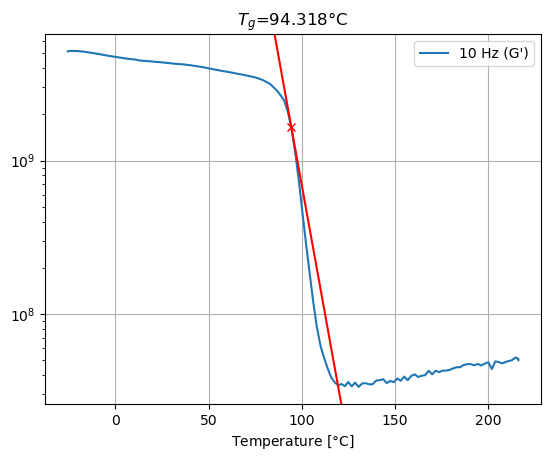

In [155]:
grads_10 = np.gradient(data_10[:,2], data_10[:,1])
inflect_10 = np.where(grads_10 == np.min(grads_10))[0][0]
T_g_10 = data_10[inflect_10][1]
plt.plot(data_10[:,1],data_10[:,2], label="10 Hz (G')")
plt.plot(data_10[inflect_10][1], data_10[inflect_10][2], 'rx')
plt.axline((data_10[inflect_10][1], data_10[inflect_10][2]),(data_10[inflect_10][1]+1, np.min(grads_10)+data_10[inflect_10][2]), color='red' )
plt.title(f'$T_g$={T_g_10:.3f}$\degree$C')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel('Temperature [$\degree$C]')
plt.show()

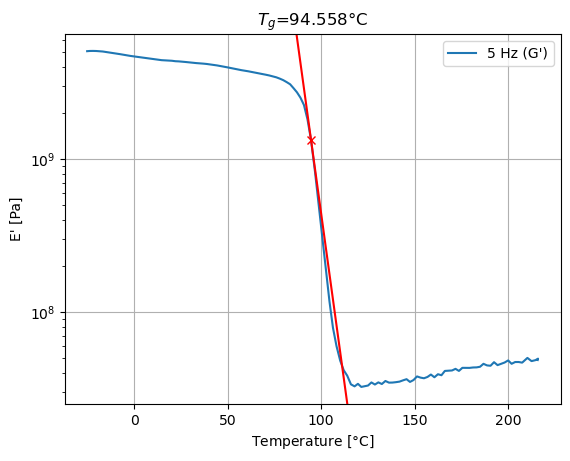

In [156]:
grads_5 = np.gradient(data_5[:,2], data_5[:,1])
inflect_5 = np.where(grads_5 == np.min(grads_5))[0][0]
T_g_5 = data_5[inflect_5][1]
plt.plot(data_5[:,1],data_5[:,2], label="5 Hz (G')")
plt.plot(data_5[inflect_5][1], data_5[inflect_5][2], 'rx')
plt.axline((data_5[inflect_5][1], data_5[inflect_5][2]),(data_5[inflect_5][1]+1, np.min(grads_5)+data_5[inflect_5][2]), color='red' )
plt.title(f'$T_g$={T_g_5:.3f}$\degree$C')
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylabel("E' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.show()

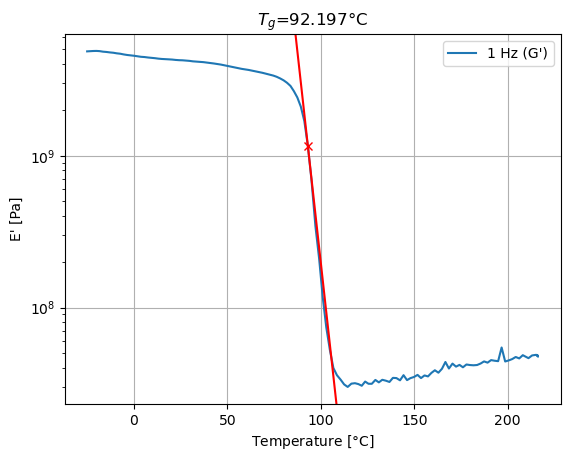

In [157]:
grads_1 = np.gradient(data_1[:,2], data_1[:,1])
inflect_1 = np.where(grads_1 == np.min(grads_1))[0][0]
T_g_1 = data_20[inflect_1][1]
plt.plot(data_1[:,1],data_1[:,2], label="1 Hz (G')")
plt.plot(data_1[inflect_1][1], data_1[inflect_1][2], 'rx')
plt.axline((data_1[inflect_1][1], data_1[inflect_1][2]),(data_1[inflect_1][1]+1, np.min(grads_1)+data_1[inflect_1][2]), color='red' )
plt.title(f'$T_g$={T_g_1:.3f}$\degree$C')
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylabel("E' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.show()

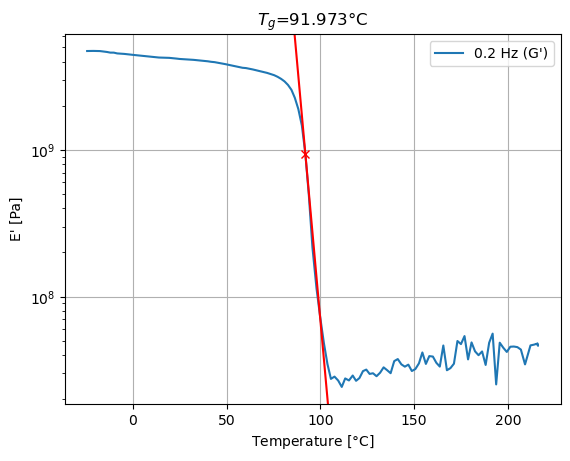

In [158]:

grads_02 = np.gradient(data_02[:,2], data_02[:,1])
inflect_02 = np.where(grads_02 == np.min(grads_02))[0][0]
T_g_02 = data_02[inflect_02][1]
plt.plot(data_02[:,1],data_02[:,2], label="0.2 Hz (G')")
plt.plot(data_02[inflect_02][1], data_02[inflect_02][2], 'rx')
plt.axline((data_02[inflect_02][1], data_02[inflect_02][2]),(data_02[inflect_02][1]+1, np.min(grads_02)+data_02[inflect_02][2]), color='red' )
plt.title(f'$T_g$={T_g_02:.3f}$\degree$C')
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylabel("E' [Pa]")
plt.xlabel('Temperature [$\degree$C]')
plt.show()

T_g_inflection = [T_g_20, T_g_10, T_g_5, T_g_1, T_g_02]

### Question 9 (6 points)

#### Other methods of finding $T_g$ also exist. One of these methods works by taking the peak of the loss modulus $G''$. The corresponding temperature is then said to be $T_g$. Another method works the same as the previously mentioned method, but uses the $tan(\delta)$ function.

#### Question 9.1: For each frequency dataset create 2 figures below and apply both methods separately. Again, report the found values of $T_g$ and show a visualisation of the method.
#### NOTE: make  an individual plot for each frequency dataset, therefore ten graphs should be plotted separately

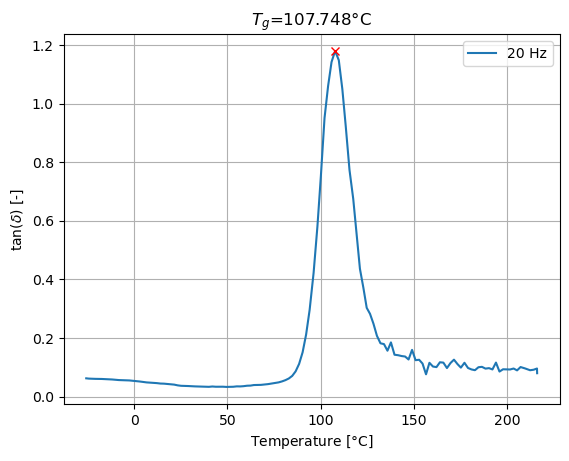

In [159]:
max_20 = np.where(data_20[:,5] == np.max(data_20[:,5]))[0][0]
T_g_20 = data_20[max_20][1]
plt.plot(data_20[:,1], data_20[:,5], label='20 Hz')
plt.plot(T_g_20, data_20[max_20][5], 'rx')
plt.title(f'$T_g$={T_g_20:.3f}$\degree$C')
plt.ylabel("tan($\delta$) [-]")
plt.xlabel('Temperature [$\degree$C]')
plt.legend()
plt.grid()
plt.show()

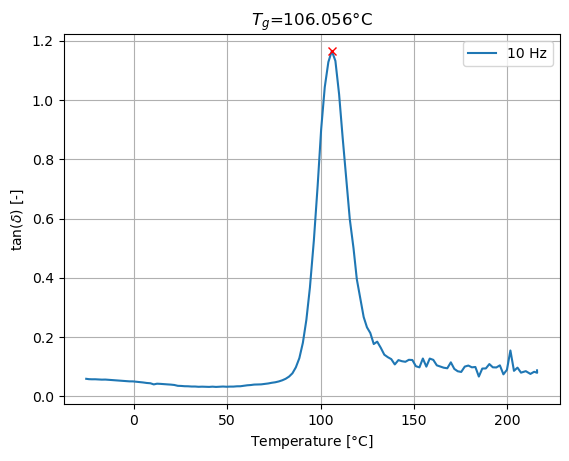

In [160]:
max_10 = np.where(data_10[:,5] == np.max(data_10[:,5]))[0][0]
T_g_10 = data_10[max_10][1]
plt.plot(data_10[:,1], data_10[:,5], label='10 Hz')
plt.plot(T_g_10, data_10[max_10][5], 'rx')
plt.title(f'$T_g$={T_g_10:.3f}$\degree$C')
plt.ylabel("tan($\delta$) [-]")
plt.xlabel('Temperature [$\degree$C]')
plt.legend()
plt.grid()
plt.show()

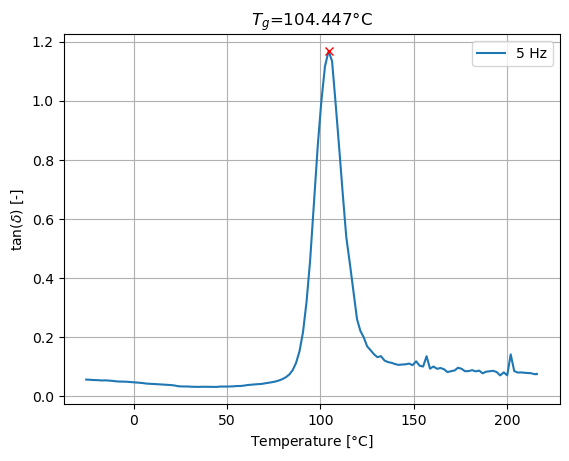

In [161]:
max_5 = np.where(data_5[:,5] == np.max(data_5[:,5]))[0][0]
T_g_5 = data_5[max_5][1]
plt.plot(data_5[:,1], data_5[:,5], label='5 Hz')
plt.plot(T_g_5, data_5[max_5][5], 'rx')
plt.title(f'$T_g$={T_g_5:.3f}$\degree$C')
plt.ylabel("tan($\delta$) [-]")
plt.xlabel('Temperature [$\degree$C]')
plt.legend()
plt.grid()
plt.show()

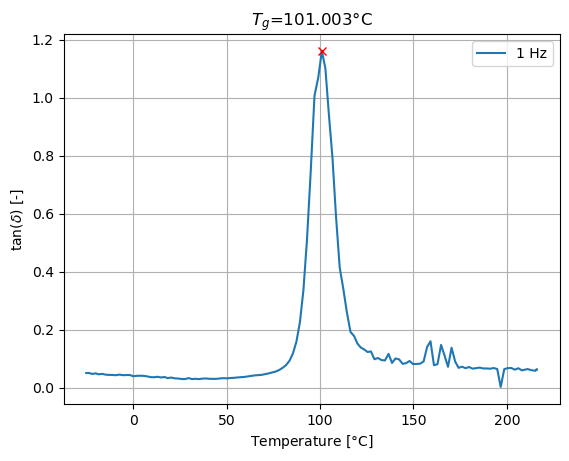

In [162]:
max_1 = np.where(data_1[:,5] == np.max(data_1[:,5]))[0][0]
T_g_1 = data_1[max_1][1]
plt.plot(data_1[:,1], data_1[:,5], label='1 Hz')
plt.plot(T_g_1, data_1[max_1][5], 'rx')
plt.title(f'$T_g$={T_g_1:.3f}$\degree$C')
plt.ylabel("tan($\delta$) [-]")
plt.xlabel('Temperature [$\degree$C]')
plt.legend()
plt.grid()
plt.show()

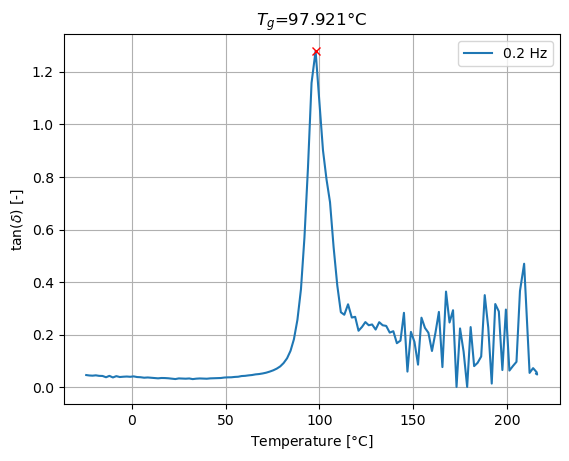

In [163]:
max_02 = np.where(data_02[:,5] == np.max(data_02[:,5]))[0][0]
T_g_02 = data_02[max_02][1]
plt.plot(data_02[:,1], data_02[:,5], label='0.2 Hz')
plt.plot(T_g_02, data_02[max_02][5], 'rx')
plt.title(f'$T_g$={T_g_02:.3f}$\degree$C')
plt.ylabel("tan($\delta$) [-]")
plt.xlabel('Temperature [$\degree$C]')
plt.legend()
plt.grid()
plt.show()

T_g_tan_delta = [T_g_20, T_g_10, T_g_5, T_g_1, T_g_02]

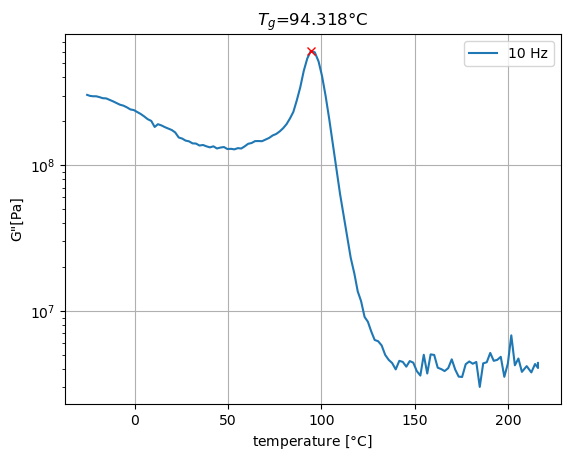

In [164]:
max_10 = np.where(data_10[:,3] == np.max(data_10[:,3]))[0][0]
T_g_10 = data_10[max_10][1]
plt.plot(data_10[:,1], data_10[:,3], label='10 Hz')
plt.plot(T_g_10, data_10[max_10][3], 'rx')
plt.title(f'$T_g$={T_g_10:.3f}$\degree$C')
plt.xlabel('temperature [$\degree$C]')
plt.ylabel('G"[Pa]')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

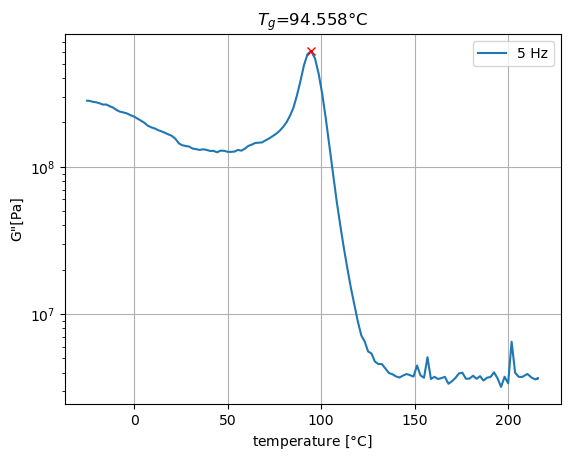

In [165]:
max_5 = np.where(data_5[:,3] == np.max(data_5[:,3]))[0][0]
T_g_5 = data_5[max_5][1]
plt.plot(data_5[:,1], data_5[:,3], label='5 Hz')
plt.plot(T_g_5, data_5[max_5][3], 'rx')
plt.title(f'$T_g$={T_g_5:.3f}$\degree$C')
plt.xlabel('temperature [$\degree$C]')
plt.ylabel('G"[Pa]')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

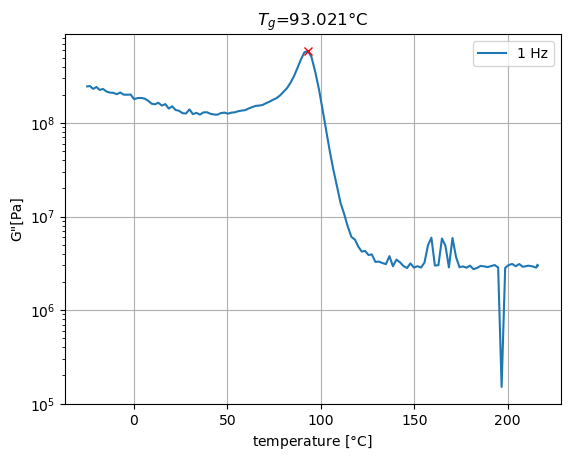

In [166]:
max_1 = np.where(data_1[:,3] == np.max(data_1[:,3]))[0][0]
T_g_1 = data_1[max_1][1]
plt.plot(data_1[:,1], data_1[:,3], label='1 Hz')
plt.plot(T_g_1, data_1[max_1][3], 'rx')
plt.title(f'$T_g$={T_g_1:.3f}$\degree$C')
plt.xlabel('temperature [$\degree$C]')
plt.ylabel('G"[Pa]')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

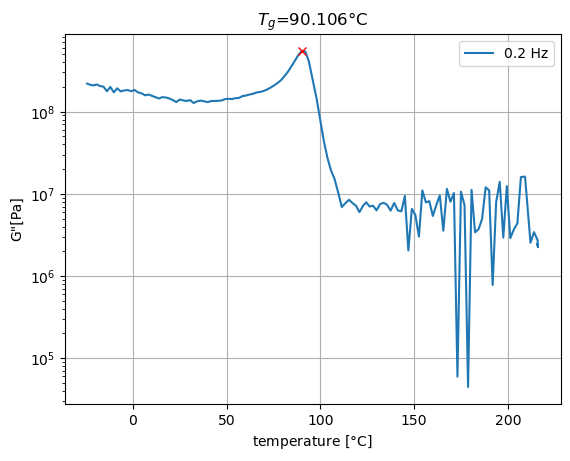

In [167]:
max_02 = np.where(data_02[:,3] == np.max(data_02[:,3]))[0][0]
T_g_02 = data_02[max_02][1]
plt.plot(data_02[:,1], data_02[:,3], label='0.2 Hz')
plt.plot(T_g_02, data_02[max_02][3], 'rx')
plt.title(f'$T_g$={T_g_02:.3f}$\degree$C')
plt.xlabel('temperature [$\degree$C]')
plt.ylabel('G"[Pa]')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

T_g_storage = [T_g_20, T_g_10, T_g_5, T_g_1, T_g_02]


#### Question 9.2: Summarize the obtained results by generating a single graph plotting the $T_g$ at different frequencies for the following methodologies (as calculated in questions 8.1-8.2 and 9.1): meaning $tan(\delta)$, loss modulus, storage modulus (onset), storage modulus (inflection point).
#### NOTE: the output should be a single graph, showing four temperature values corresponding to the four methods, with the tested frequencies reported on the x-axis

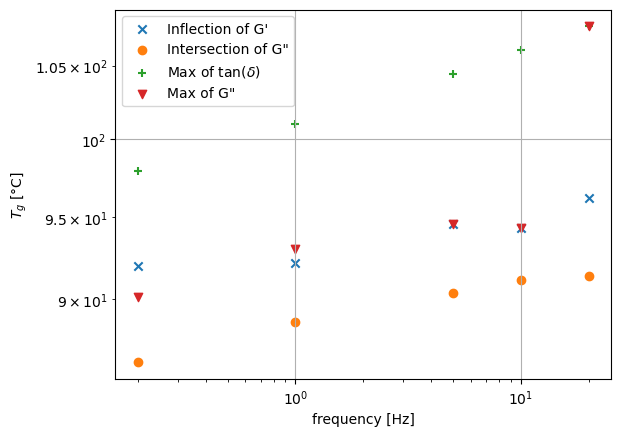

In [168]:
# Code for plot here
plt.scatter(frequencies, T_g_inflection, marker='x',label="Inflection of G'")
plt.scatter(frequencies, T_g_intersection, marker='o', label='Intersection of G"')
plt.scatter(frequencies, T_g_tan_delta, marker='+', label="Max of tan($\delta$)")
plt.scatter(frequencies, T_g_storage, marker='v', label='Max of G"')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend()
plt.xlabel('frequency [Hz]')
plt.ylabel('$T_g$ [$\degree$C]')
plt.show()


#### Now that several important aspects of viscosity of reacting polymers have been discussed, we will take a look at how this material property and other material and process parameters play a role in polymer flow. . In this case we will consider RTM. This will be done with the help of Darcy's law. The most widely used equation for describing flow through RTM molds is Darcy’s equation for flow through porous media, displayed in the equation below.
$$ Q = \frac{K_{ij}A}{\eta L} \Delta P $$

#### For which $K_{ij}$ is the permeability tensor of the preform and $L$ is the distance travelled by the resin. An average value of $K$ can be found from the Kozeny-Carman equations for resin flow in a unidirectional fibre network. For further information, please visit Chapter 4.4 ''Resin Flow'' from Processing of Polymer Matrix Composites by P.K. Mallick.


### Question 10 (7 points)

#### Question 10.1: Consider the panel in the picture below. The panel consists of a preform and still needs to be injected with epoxy resin. The fibres are T700 carbon fibres, the fibre volume content can be set to 40% (already at time of injection). The lay-up is [20%@90° / 30%@+-45° / 50%@0°] symmetric and balanced, with the 0 degree direction aligned in the length direction of the panel. The injection and mould temperatures are 120°C. The gelation time of the resin is set to 90 minutes. The viscosity of the resin can be assumed to linearly increase from 0.03 to 0.045 Pa.s over the course of 90minutes, at a temperature of 120°C.

![title](flow_fig.png)

#### It is required to perform injection at a constant flow rate. To achieve this, please determine the required pressure gradient [Bar] over time [min] and report your results in a graph. Additionally, report the undertaken steps to find a proper value of $K$ (provide sources as well).

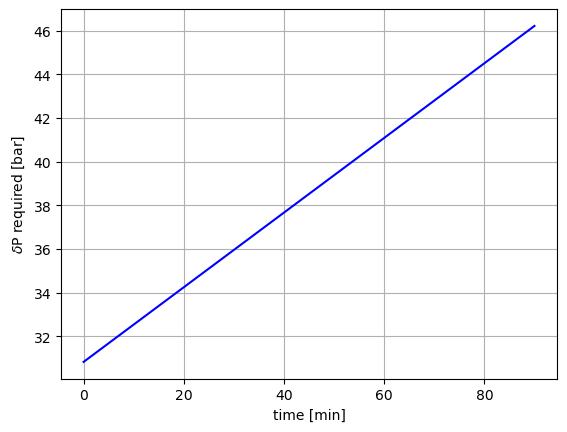

30.81775348525412
46.226630227881174


In [169]:
L = 1 #[m]
gel_time = 90 * 60 # [sec]
d_f = 7e-6 #[m] diameter of the fibre, or filament?
v_f = 0.4 #[-] volume fraction of fibres
fiber_network = 'hexagonal' 

def k(angle, fiber_network=fiber_network, d_f=d_f, v_f=v_f):
    theta = angle * np.pi / 180. # [rad] input in degrees
    if fiber_network == 'hexagonal':
        C_1, C_2, v_f_max  = 53, 16/(9*np.pi*np.sqrt(6)), np.pi/(2*np.sqrt(3))
    elif fiber_network == 'square':
        C_1, C_2, v_f_max  = 57, 0.4, 0.785     
    k_11 = (2 * d_f**2 / C_1) * ((1-v_f)**3/v_f**2)
    k_22 = C_2 * (np.sqrt(v_f_max/v_f)-1)**(5/2) * d_f**2 / 4

    return k_11*np.cos(theta)**2 + k_22*np.sin(theta)**2

def K(offset=0, v_f=v_f):
    # [20%@90° / 30%@+-45° / 50%@0°]
    return 0.2*k(90.+offset, v_f=v_f) + 0.3*k(45.+offset, v_f=v_f) + 0.5*k(0.+offset, v_f=v_f)  

def pressure_gradient(t, offset=0, L=L, gel_time=gel_time, v_f=v_f, eta_end=0.045):
    # viscosity eta
    eta = 0.03 + t * (eta_end-0.03)/gel_time
    # permeability K
    return L**2 * eta / (gel_time * K(offset=offset, v_f=v_f))

t = np.linspace(0,5400,5400)
plt.plot(t/60, pressure_gradient(t)/1e5, color='blue')
plt.xlabel('time [min]')
plt.ylabel('$\delta$P required [bar]')
plt.grid()
plt.show()
print(pressure_gradient(t[0])/1e5)
print(pressure_gradient(t[-1])/1e5)

Answer: To find a proper value of K, we use the equations for $K_{11}$ and $K_{22}$ from Gebart (1.
Gebart BR. Permeability of Unidirectional Reinforcements for RTM. Journal of Composite Materials. 1992;26(8):1100-1133. doi:https://doi.org/10.1177/002199839202600802) and we use the equation for $K_{xx}$ (4.24) of Mallick (Mallick, P.K. (2017). Processing of Polymer Matrix Composites (1st ed.). CRC Press. https://doi.org/10.1201/9781315157252). The equations require a fiber dimater, which we interpret as the filament diameter. If we look at the T700S spec sheet from Toray (https://www.toraycma.com/wp-content/uploads/T700S-Technical-Data-Sheet-1.pdf.pdf) the filament diameter is stated to be $7\mu m$, and this gives required pressure gradients on the order of 10 bar. If we use fibre in the sense it is defined in the above mentioned book of Mallick, what we mean is a tow. From the Toray spec sheet, for example, a 12K tow has a mass of $800g$, length of $1000m$ and a density of $1.8g/cm^3$. With this, we can estimate the fibre diameter to be about $0.75mm$. Using this value in the calculation gives us a pressure gradient one the order of $10^{-3} bar$ which seems implausible. We thus use the 'fibre'in the sense of 'filament', with a diameter of $7\mu m$. We use the $K_{xx}$ equation with values of $\theta$ of $0\degree$, $45\degree$ and $90\degree$ to arrive at a value of $1.8*10^{-12} m^2$. We assume a hexagonal packing, as this seems like what naturally hapens when a lot of filaments are put together, a square is hard to achieve.


#### Question 10.2: First, comment on the required pressure gradients you obtained in the previous question.
#### Now, consider another infusion of the same preform. The gelation time of the resin is set to 90 minutes at 120°C.
#### If you were to optimize the manufacturing parameters for this technique, what specific modifications or improvements would you propose? Consider infusion direction, number of resin inlets, any possible steps in the process and which pressure should be applied. Propose two possible approaches and compare them.
#### Finally, compare your optimized strategies with the results obtained in question 10.1 by visualizing plots for the required pressure gradient [Bar] over time [min]. Provide your reflection about the outcomes in the cells below.

#### NOTE: If your optimized manufacturing process includes changes in infusion direction, make sure to consider proper assumptions and values for the calculated permeability of the preform.

Reflection: The required pressure gradient increases from about 31 to 46 bar. The gradient increases linearly, as the only thing that is changing in the equation of Darcy is the viscosity, and that increases linearly too. The maximum pressure gradient seems high, but in line with the pressures possible with RTM; the lectures included several graphs with pressures of 30-150 bar possible with HP-RTM. 

Optimization strategy: 
Without changing too much, we can simply let the resin infuse from a different position along the preform. One option is to infuse from the middle and push the resin to the left and right. The other option is to change the infusion direction, for example by having the infusion line located on the middle horizontal, infusing both up and down. The 'effective' length over which we diffuse is thus $0.5m$ in Option 1 and $0.125m$ in Option 2. Strategy 1: infuse in the middle, so the direction of infusion is both to the right and left at the same time. The only thing to change is $L=0.5m$. Strategy 2: infuse from middle horizontal, infusing up and down at the same time. We change the 'offset' parameter to $90\degree$ to account for the change in infusion direction, $L=0.125m$. 


11.556657556970293
46.226630227881174
1.0776405760193397


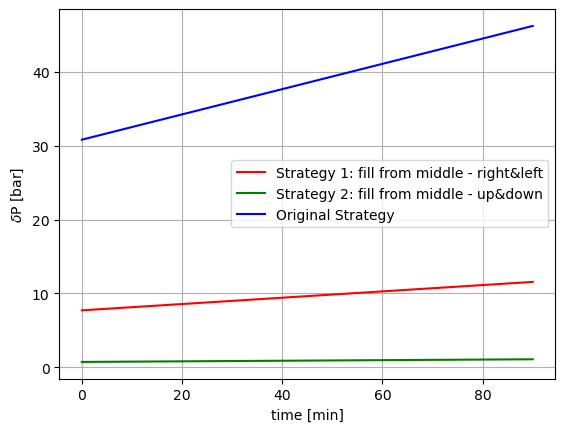

In [170]:
plt.plot(t/60, pressure_gradient(t, L=0.5)/1e5, label='Strategy 1: fill from middle - right&left', color='red')
plt.plot(t/60, pressure_gradient(t, offset=90., L=0.125)/1e5, label='Strategy 2: fill from middle - up&down', color='green')
#plt.plot(t/60, pressure_gradient(t, offset=90., L=0.5)/1e5, label='Strategy 3: fill from bottom - up')
plt.plot(t/60, pressure_gradient(t)/1e5, label='Original Strategy', color='blue')
print(pressure_gradient(t[-1], L=0.5)/1e5)
print(pressure_gradient(t[-1], L=1.0)/1e5)
print(pressure_gradient(t[-1], offset=90., L=0.125)/1e5)


plt.legend()
plt.xlabel('time [min]')
plt.ylabel('$\delta$P [bar]')
plt.grid()
plt.show()

Reflection: We can see that Option 1 already reduces the maximum pressure required, compared to the original, from over 46 to less than 12 bar, while Option 2 reduces it under just over 1 bar. It definitely makes sense to consider using different orientations from the original, as the required pressures are much lower, thus cheaper. The change in infusion direction could mean that regular RTM could be used, instead of HP-RTM. Aslo, we plot just the minumum required pressure for infusion, but if higher pressures can be achieved, the time for infusion could be reduced significantly.

### Question 11 (4 points)

#### As you know, fibre volume content $V_f$ plays an important role in the permeability of a preform and therefore influences the required injection pressure. Now, assume a constant viscosity of 0.03  Pa.s and a distance of 1 meter for the resin to flow. Determine the required pressure to inject over this distance in 40 minutes, for different fibre volume fractions from 0.35 to 0.65 with steps of 0.05. Note: the laminate is the same as described in the previous question (Q10).

#### - Create a graph showing $K$ (on a logarithmic scale) vs. $V_f$ (x-axis)
#### - Next, report your results by plotting the required $\Delta P$ for infusion per fibre volume fraction $V_f$
#### - Finally, comment on your results and critically analyse the obtained values

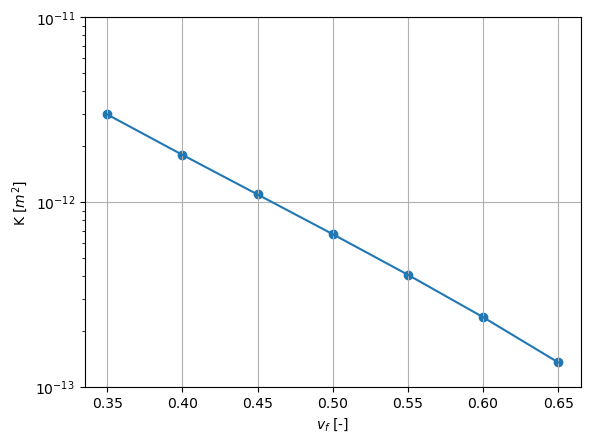

In [171]:
# Code for 1st plot here
v_f = np.arange(0.35,0.65,0.05)
ks = []
for i in v_f:
    ks.append(K(v_f=i))

plt.scatter(v_f, ks)
plt.plot(v_f, ks)
plt.ylim(1e-13,1e-11)
plt.yscale('log')
plt.xlabel('$v_f$ [-]')
plt.ylabel('K [$m^2$]')
plt.grid()
plt.show()

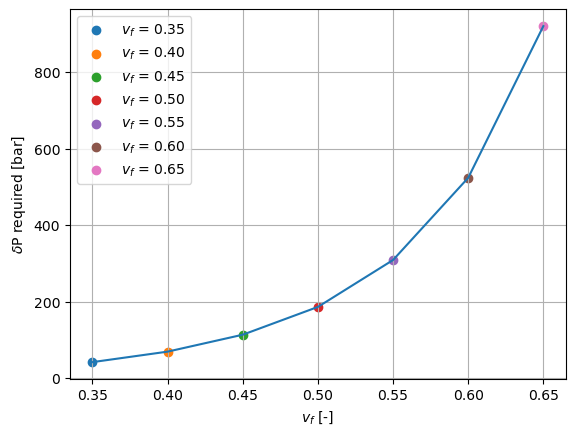

In [181]:
# Code for 2nd plot here
gel_time = 40 * 60 
eta_end = 0.03

pressure = []
#horizontal = []
for i in v_f:
    plt.scatter(i, pressure_gradient(0, v_f=i, gel_time=gel_time, eta_end=eta_end)/1e5, label=f'$v_f$ = {i:.2f}')
    pressure.append(pressure_gradient(0, v_f=i, gel_time=gel_time, eta_end=eta_end)/1e5)
    #plt.scatter(i, pressure_gradient(0, offset=90., L=0.125, v_f=i, gel_time=gel_time, eta_end=eta_end)/1e5)
    #horizontal.append(pressure_gradient(0, offset=90., L=0.125, v_f=i, gel_time=gel_time, eta_end=eta_end)/1e5)

#print(horizontal)
plt.plot(v_f, pressure)
plt.legend()
plt.xlabel('$v_f$ [-]')
plt.ylabel('$\delta$P required [bar]')
plt.grid()
plt.show()

Comment: We can see that there is a large decrease in the permeability as the volume fraction decreases, K goes  from $30*10^{-13}m^2$ to $14*10^{-13}m^2$. The required pressure for a 40 min infusion increases dramatically, from 40 to over 900 bar. So a (almost) doubling of the volume fraction from 0.35 to 0.65 leads to a 22x increase in the required pressure. The value of 900 bar is extremely high, not used with conventional RTM. This shows just how difficult it is to increase the volume fraction in composites, as the required pressures quickly become very large. High pressure RTM (HP-RTM) can go to about 150 bar, so a maximum fibre volume fraction of just 0.45 can be achieved under these conditions. If, however we were to infuse from the middle horizontal, the required pressure would be much lower. If you uncomment the lines for 'horizontal', it can be seen than the maximum required pressure, even at $v_f=0.65$ is about 21 bar, which is a huge improvement compared to the original 900 bar.

### Bonus question (3 points)

#### In this notebook you focused on how DMA measurements can be used to evaluate the mechanical and physical behaviour of polymers while curing and their glass transition temperatures. In this section, DMA is used to evaluate thermal cycling effects on CFRP.

#### In the coming decades carbon fiber-reinforced polymer materials will be widely employed in manufacturing parts suitable for space applications, due to their combination of optimal mechanical properties and low density. When exposed to the space environment, operational conditions cause the composites to undergo cyclic temperature changes, between -196°C and 180°C.

#### Through experimental simulations, the effect of thermal cycles has been studied. 
#### Which chemical and physical effects of thermal cycling on composites would you expect? Focus specifically on the variations you would expect to see through DMA testing.

Answer: 
We would expect the $T_g$ of the polymer to increase due to the high temperature. This higher temperature will lead to more cross-linking, resulting in post-curing and a higher degree of cure. This will translate to a higher $T_g$ for the polymer itself. However, when talking about the composite as a whole, we have to consider the interaction of the fibre and the matrix. As can be see in the figure by Mahdavi et.al. [1] below, it depends if the composite is UD or cross-ply.  They cycled between -196 $\degree C$ and +140 $\degree C$. The competing forces are the increased cross-linking and microcrack formation and propagation. For a UD composite, the cross-linking increase is more important up to 150 cycles in this case, and we observe an increase in $T_g$. After this, the cracks become more dominant, and the $T_g$ of the composite is lowered again. For a cross-ply, we observe and immediate decrease in $T_g$ due to the formation of cracks due to a mismatch in CTE between the resin and the matrix. After that, we observe an increase in $T_g$ as the cross-linking degree increases, but never compensates for the decrease of $T_g$ due to the presence of the microcracks. [1] We would expect the storage modulus of the cross-ply to decrease more than the UD as the microcracks prevent the composite from storing some elastic energy, because these cracks are more relevant in a cross-ply as the matrix takes up more of the load than in a UD composite.

On the other hand, the Shishevan et al. [2] thermally cycled a cross-ply Basalt fibre composite, cycled between -40 $\degree C$ and +120 $\degree C$. They showed an increase in $T_g$ with increasing thermal cycling. This would suggest that the matrix cross-linking was more important for the increase in $T_g$ compared to the increase in microcrack density. What this suggests is that the change of $T_g$ of a composite is highly dependent on the matrix and fibre combination chosen. Only 80 cycles were performed in the second study, while 200 were performed in the first. We would predict that if more cycles were performed, the $T_g$ of the basalt-composite would decrease as well. What can be said is that the $T_g$ of the matrix generally increases due to the higher temperatures and thus additional cross-linking. The $T_g$ decreases due to the microcracking density increaseing due to the mismatch of the CTE of fibre-matrix. It depends on the interplay of these two whether the $T_g$ of the composite increases or decreases.


<img src="tg_cycles.png" alt="Kitten" title="A cute kitten" width="400" height="250" />
Image source: [1]

1. Mahdavi, Soheila, Gupta, Shambhu Kumar and Hojjati, Mehdi. "Thermal cycling of composite laminates made of out-of-autoclave materials" Science and Engineering of Composite Materials, vol. 25, no. 6, 2018, pp. 1145-1156. https://doi.org/10.1515/secm-2017-0132

2. Azimpour-Shishevan, F., Akbulut, H. & Mohtadi-Bonab, M.A. Effect of thermal cycling on mechanical and thermal properties of basalt fibre-reinforced epoxy composites. Bull Mater Sci 43, 88 (2020). https://doi.org/10.1007/s12034-020-2059-y

